In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

plt.rcParams["svg.fonttype"] = "none"
plt.rcParams["pdf.fonttype"] = 42
import basty.project.experiment_processing as experiment_processing
import seaborn as sns

sns.set_theme(style="dark")
from basty.utils import misc
from process_results import BehaviorData
from filter_flies import FilterData
from input import Input

import sys

sys.path.append(r"C:\Users\Grover\Documents\GitHub>basty")

In [2]:
CONFIG_PATH = r"Z:\mfk\basty-projects\main_cfg.yaml"
project = experiment_processing.Project(CONFIG_PATH)
FPS = project.fps
FIG_PATH = r"C:\Users\Grover\Documents\GitHub\deepsleepfigs"

RESULTS_FOLDER = r"Z:\mfk\basty-projects\backup-allnohaltere\results\semisupervised_pair_kNN\predictions.15NN.neighbor_weights-distance.neighbor_weights_norm-log_count.activation-standard.voting-soft.voting_weights-None\exports"

BODY_PART_SETS = {"ProboscisPumping": "prob"}

TMP_RESULT_FOLDER = r"Z:\mfk\basty-projects"

BEHAVIORS = [
    "Idle&Other",
    "PosturalAdjustment&Moving",
    "Feeding",
    "Grooming",
    "ProboscisPumping",
]

In [3]:
io_process = Input(project, RESULTS_FOLDER, TMP_RESULT_FOLDER)
expt_info_df = io_process.load_expt_info()
df_data = io_process.load_predictions()
df_data.drop(["HaltereSwitch", "Noise"], axis=1, inplace=True)
io_process.create_binary_masks_subfolders(BEHAVIORS)

In [4]:
llh = misc.get_likelihood(project.data_path_dict, CONFIG_PATH)
llh = llh[llh["ExptNames"].isin(df_data.ExptNames.unique())]

Loading existing llh_df.pickle file...


In [5]:
process_data = BehaviorData(df_data, binary_mask_threshold=0.8)

In [6]:
process_data.process_expt_names_parallel(
    llh, io_process.get_binary_mask_subfolder("ProboscisPumping")
)

File Fly05182022_5d_median6_threshold0.8.pkl already exists. Skipping calculation.File Fly05202022_5d_median6_threshold0.8.pkl already exists. Skipping calculation.
File Fly05222022_5d_median6_threshold0.8.pkl already exists. Skipping calculation.
File Fly05252022_SD_5d_median6_threshold0.8.pkl already exists. Skipping calculation.
File Fly05272022_SD_5d_median6_threshold0.8.pkl already exists. Skipping calculation.

File Fly06072022_5d_median6_threshold0.8.pkl already exists. Skipping calculation.
File Fly06082022_5d_median6_threshold0.8.pkl already exists. Skipping calculation.
File Fly06142022_SD_5d_median6_threshold0.8.pkl already exists. Skipping calculation.
File Fly06152022_6d_median6_threshold0.8.pkl already exists. Skipping calculation.
File Fly06182022_4d_median6_threshold0.8.pkl already exists. Skipping calculation.
File Fly06202022_5d_median6_threshold0.8.pkl already exists. Skipping calculation.
File Fly06212022_5d_median6_threshold0.8.pkl already exists. Skipping calculat

In [7]:
masks_based_on_likelihood = io_process.load_binary_mask('ProboscisPumping')
beh_masks = process_data.create_binary_mask_from_behaviors(BEHAVIORS,'ProboscisPumping')
masked_data = process_data.update_dictionary_with_final_masked(masks_based_on_likelihood,beh_masks,'ProboscisPumping')

In [75]:
import process_results
from process_results import BehaviorData
import importlib
importlib.reload(process_results)
from process_results import BehaviorData
bouts_dict = BehaviorData.find_consecutive_bouts_and_snap_fts(masked_data,io_process,'ProboscisPumping',60,30*6,60,force_recalculate=True )

Processing Experiments: 100%|██████████| 61/61 [01:15<00:00,  1.24s/it] 


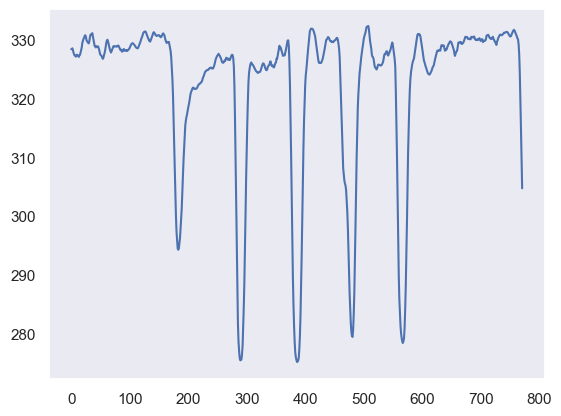

In [83]:
plt.plot(bouts_dict[expt_name]['distance.origin-prob'][10])

In [77]:
bouts_dict[expt_name]

,start_index,stop_index,region,pose.prob_x,pose.prob_y,pose.halt_x,pose.halt_y,pose.thor_post_x,pose.thor_post_y,distance.origin-halt,distance.origin-prob,distance.origin-thor_post,distance.head-prob,distance.thor_post-halt,"distance.avg(thor_post-joint1,thor_post-joint2,thor_post-joint3)","distance.avg(origin-joint1,origin-joint2,origin-joint3)"
0,2709,4150,Fly05182022_5d,"[760.1754768614968, 759.9495791122317, 759.314...","[643.7969501589736, 643.8115276272098, 643.826...","[592.9317913154761, 593.1565224826336, 593.309...","[589.5367262363434, 589.5722079674402, 589.688...","[600.0360213716825, 600.215499907732, 600.2907...","[551.202330638965, 551.2019241551558, 551.2332...","[836.1349536612165, 836.3193460462898, 836.509...","[996.1632740949648, 996.0003242462021, 995.524...","[814.7804834710912, 814.9123925440297, 814.988...","[84.65729132821554, 84.64979844544531, 84.4619...","[38.98712570205464, 39.01420051882787, 39.0835...","[144.6017774786682, 144.77250681017924, 144.94...","[916.5625149785716, 916.7090515324326, 916.876..."
1,17293,17716,Fly05182022_5d,"[758.7271022001902, 758.4068006873131, 758.230...","[638.5467662215233, 638.1820163726807, 638.222...","[590.5506588419279, 590.6575207511584, 590.918...","[591.6648944218954, 591.6889579296112, 591.683...","[597.7585718631744, 597.6210833986601, 597.596...","[550.7174514184395, 550.6946945736805, 550.692...","[835.9530058262293, 836.0455309106881, 836.226...","[991.6696971598268, 991.1897706041292, 991.080...","[812.7761201786893, 812.6595879912987, 812.640...","[79.6449913530045, 79.3272881367462, 79.436532...","[41.577002040107736, 41.58149627948809, 41.531...","[145.50830084533752, 145.4614443291837, 145.47...","[915.177028051619, 914.9951738749593, 914.8545..."
2,40744,41143,Fly05182022_5d,"[759.6926031112671, 759.2866978794336, 759.059...","[639.9879573980967, 639.7481879691283, 639.540...","[592.1261249979337, 591.8743076920509, 591.752...","[588.0913710395495, 587.9285125136375, 587.765...","[598.5428354740143, 598.5527556339899, 598.584...","[552.3590522607168, 552.3876703381538, 552.316...","[834.5446714204373, 834.2512402942192, 834.049...","[993.3365174182218, 992.8716098199391, 992.563...","[814.4654986625462, 814.4921973958104, 814.467...","[80.19642398013795, 79.8390946901891, 79.48949...","[36.30389481372433, 36.16286948592203, 36.1012...","[141.61848695652114, 141.46218148145627, 141.4...","[916.53306033963, 916.291036151094, 916.174096..."
3,42625,43946,Fly05182022_5d,"[761.6069444616636, 761.594204823176, 761.5814...","[644.0867912769318, 644.1721591552099, 644.257...","[592.2852558692297, 592.3059625228246, 592.150...","[590.3180412054062, 590.1743007302284, 590.229...","[598.3000665505728, 598.3225275675455, 598.248...","[553.3872932493687, 553.4285546938578, 553.511...","[836.2279677771287, 836.1411713834594, 836.069...","[997.4431976557088, 997.488598155854, 997.5340...","[814.9849483053553, 815.029454771635, 815.0318...","[84.69840259536306, 84.69937791288184, 84.7005...","[37.41735014835722, 37.23504943875871, 37.2206...","[141.11870621140284, 141.0854485033127, 141.02...","[917.3948898518914, 917.5254430268642, 917.608..."
4,44281,44650,Fly05182022_5d,"[760.4150972912709, 760.6770641406378, 760.878...","[640.9290861487389, 641.3210790356001, 641.713...","[590.754028836886, 590.893727918466, 591.01071...","[590.3676739931107, 590.1936082442602, 590.019...","[599.1158301631609, 599.4093454480171, 599.628...","[553.2011853506168, 553.0687080522379, 552.847...","[835.1792101597406, 835.1550113037467, 835.114...","[994.4954568322323, 994.9484018405208, 995.354...","[815.4577422683661, 815.5835697443837, 815.594...","[83.16290996944717, 83.58437798241583, 84.0878...","[38.09550628922939, 38.08902671606637, 38.1576...","[141.4047962102637, 141.27562914386826, 141.24...","[917.7660986029651, 917.5736803048885, 917.377..."
5,55235,56248,Fly05182022_5d,"[760.5242028236389, 760.3326519727707, 759.766...","[637.855410794417, 637.6589689850807, 637.5401

In [ ]:
newDf = pd.merge(df_data, expt_info_df, left_on="ExptNames", right_on="ExptNames")

In [ ]:
# Create a folder named binary mask and a subfolder for each predicted behavior.
# Within that folder save binary mask generated using the likelihood score

In [ ]:
wt_all = newDf[newDf["SD"] == False]
male_wt = wt_all[wt_all["Sex"] == "M"]
female_wt = wt_all[wt_all["Sex"] == "F"]

In [ ]:
newDf

In [ ]:
filterer = FilterData(newDf, llh)

In [ ]:
filterer.plot_mean_likelihood()

In [ ]:
binary_mask = filterer.create_binary_masks(llh, BODY_PART_SETS, 0.7)

In [ ]:
masked_data_df = filterer.apply_binary_masks(binary_mask, newDf)

In [ ]:
masked_data_df

In [ ]:
binary_mask

In [ ]:
masked_data_df

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is called 'masked_data_df'
# and has columns 'ExptNames', 'ValueColumn' (replace with your actual column name)
# Add row numbers if they don't exist
masked_data_df["Row"] = masked_data_df.index

# Pivot the DataFrame
pivoted_df = masked_data_df.pivot(
    index="ExptNames", columns="Row", values="ProboscisPumping"
)

# Create a heatmap using Seaborn, handling NaN values with a different color (e.g., gray)
plt.figure(figsize=(16, 9))
sns.heatmap(
    pivoted_df,
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={"ticks": [0, 1]},
    mask=pivoted_df.isna(),
    linecolor="gray",
)

# Set plot attributes
plt.xlabel("Rows")
plt.ylabel("ExptNames")
plt.title("Heatmap of Data")

# Save the plot as a PNG file
FIG_PATH = r"C:\Users\Grover\Documents\GitHub\deepsleepfigs"
plt.savefig(f"{FIG_PATH}\\heatmap.png", dpi=300, bbox_inches="tight")

# Display the plot in the notebook (optional)
plt.show()

In [ ]:
plot_folder = r"C:\Users\Grover\Documents\GitHub\deepsleepfigs\score_plots"
if not os.path.isdir(plot_folder):
    os.makedirs(plot_folder)

In [ ]:
male_wt["Time"] = male_wt["Idx"].apply(BehaviorData.get_time_stamp)
male_wt.index = pd.to_datetime(list(male_wt["Time"]))
rate = "1S"
male_wt_rs = BehaviorData.resample_df(male_wt, rate, BEHAVIORS)
male_wt_rs["TimeStamp"] = male_wt_rs.index

In [ ]:
male_wt

In [ ]:
llh["Time"] = llh["Idx"].apply(BehaviorData.get_time_stamp)

In [ ]:
BehaviorData.pivot_and_plot(male_wt_rs, "mal_b_scr_", plot_folder, rate, BEHAVIORS)

In [ ]:
import os

In [ ]:
os.listdir(plot_folder)

In [ ]:
df_pivoted = male_wt_rs.pivot(
    index="ExptNames", columns="TimeStamp", values="ProboscisPumping"
)
a4_dims = (25.7, 5.27)
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("ProboscisPumping")
ax = sns.heatmap(df_pivoted, cmap="YlGnBu")

In [ ]:
male_wt_rs

In [ ]:
result_df_parallel = BehaviorData.process_expt_names_parallel(male_wt, llh)
print(result_df_parallel)

unique_expt_names = male_wt["ExptNames"].unique()

unmasked_data = np.vstack(
    [result_df_parallel[f"{expt_name}_unmasked"] for expt_name in unique_expt_names]
)
masked_data = np.vstack(
    [result_df_parallel[f"{expt_name}_masked"] for expt_name in unique_expt_names]
)

# Plot the heatmap
plt.figure(figsize=(10, 3))
sns.heatmap(data, cmap="YlGnBu")
plt.xlabel("Data")
plt.ylabel("Arrays")
plt.yticks([0.5, 1.5], ["Array 1", "Array 2"], rotation=0)
plt.show()

In [ ]:
unique_expt_names = male_wt["ExptNames"].unique()

a4_dims = (25.7, 5.27)
# Plot the unmasked data heatmap
# plt.figure(figsize=(a4_dims))
# sns.heatmap(unmasked_data, cmap='YlGnBu', yticklabels=unique_expt_names)
# plt.xlabel('Data')
# plt.ylabel('ExptNames')
# plt.title('Unmasked Data')
# plt.savefig(os.path.join(plot_folder,'unmasked_data_heatmap_full_07.png'), dpi=300)  # Save the figure as a PNG file
# plt.show()

In [ ]:
# Plot the masked data heatmap
plt.figure(figsize=(a4_dims))
sns.heatmap(masked_data, cmap="YlGnBu", yticklabels=unique_expt_names)
plt.xlabel("Data")
plt.ylabel("ExptNames")
plt.title("Masked Data")
plt.savefig(os.path.join(plot_folder, "masked_data_heatmap_full_09.png"), dpi=300)
plt.show()

In [ ]:
snap_paths = [
    {expt_names: os.path.join(project.project_path, expt_names, "snap_stft.pkl")}
    for expt_names in project.expt_names
]
snap_col_names = [
    os.path.join(project.project_path, expt_names, "ftname_to_snapft.yaml")
    for expt_names in project.expt_names
]

In [ ]:
df_data

In [ ]:
df_data